In [522]:
import numpy as np
import pandas as pd

In [523]:
master_mall = pd.read_csv(r"D:\PG-DAI\MachineLearning\Dec 17 KMeans & PCA\Mall_Customers.csv")

In [524]:
master_mall.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [525]:
master_mall.isna().value_counts()

CustomerID  Genre  Age    Annual_Income_(k$)  Spending_Score
False       False  False  False               False             200
dtype: int64

In [526]:
master_mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [527]:
# dummies_mall = pd.get_dummies(master_mall, columns=['Genre'])
# one_hot_data = pd.get_dummies(master_mall, columns = ['Genre'])


In [528]:
# one_hot_data

In [529]:

# one_hot_data.columns = one_hot_data.columns.str.replace('Genre_Female', 'Genre')
del master_mall['Genre']
del master_mall['CustomerID']
del master_mall['Age']

In [530]:
master_mall

,Annual_Income_(k$),Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [531]:
# first = one_hot_data.iloc[:, :-1].values
# last = one_hot_data['Genre']

In [532]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# #'Fit' and transform the train set; and transform using the fit on the test set later 

# scaler = StandardScaler() 
# scaleddata = scaler.fit_transform(first)

In [533]:
# scaleddata= pd.DataFrame(scaleddata)

In [534]:
# scaleddata

In [535]:

# train_data = pd.concat([scaleddata, last], axis=1, join='inner')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            200 non-null    float64
 1   AnnualIncome   200 non-null    float64
 2   SpendingScore  200 non-null    float64
 3   Genre          200 non-null    uint8  
dtypes: float64(3), uint8(1)
memory usage: 5.0 KB


In [536]:
# train_data.columns = [ 'Age', 'AnnualIncome', 'SpendingScore','Genre']

In [537]:
# train_data

In [538]:
from sklearn.cluster import KMeans
sse = []
kmeans = range(1,20)
for k in kmeans:
    km = KMeans(n_clusters=k)
    km.fit(master_mall)
    sse.append(km.inertia_)
    
print(sse)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[269981.28, 181665.82312925172, 106348.37306211119, 73679.78903948834, 44448.45544793371, 37265.86520484346, 30241.343617936585, 25061.304119069333, 22155.14949036471, 19664.685196005543, 17508.970577400072, 15933.528627286694, 14364.908210008945, 12738.312658437659, 11718.493442084233, 10910.78883002962, 9937.375086580087, 9543.5715953129, 8789.526678876678]


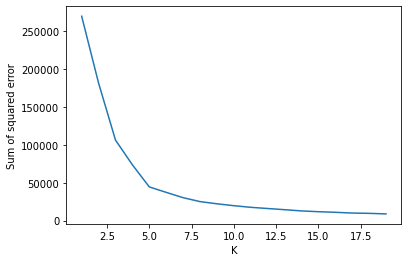

In [539]:
import matplotlib.pyplot as plt
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(kmeans,sse)

In [547]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(master_mall)
y_predicted

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [548]:
km.cluster_centers_

array([[88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [549]:
y_predicted = pd.DataFrame(y_predicted)

In [543]:
# pred_data = pd.concat([master_mall, y_predicted], axis=1, join='inner')

In [552]:
master_mall['Cluster'] = y_predicted

In [555]:
# pred_data.columns = [ 'Age', 'AnnualIncome', 'SpendingScore','Cluster']
pred_data=master_mall

In [558]:
pred_data

,Annual_Income_(k$),Spending_Score,Cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,0
197,126,74,1
198,137,18,0


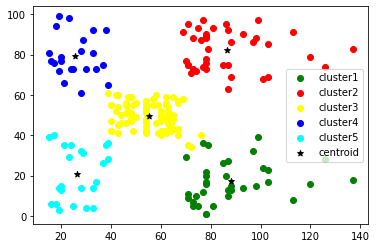

In [560]:
df_plot1 = pred_data[pred_data.Cluster==0]
df_plot2 = pred_data[pred_data.Cluster==1]
df_plot3 = pred_data[pred_data.Cluster==2]
df_plot4 = pred_data[pred_data.Cluster==3]
df_plot5 = pred_data[pred_data.Cluster==4]

plt.scatter(df_plot1['Annual_Income_(k$)'],df_plot1['Spending_Score'],color='green',label='cluster1')
plt.scatter(df_plot2['Annual_Income_(k$)'],df_plot2['Spending_Score'],color='red',label='cluster2')
plt.scatter(df_plot3['Annual_Income_(k$)'],df_plot3['Spending_Score'],color='yellow',label='cluster3')
plt.scatter(df_plot4['Annual_Income_(k$)'],df_plot4['Spending_Score'],color='blue',label='cluster4')
plt.scatter(df_plot5['Annual_Income_(k$)'],df_plot5['Spending_Score'],color='cyan',label='cluster5')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.legend()